# Form factor with detector resolution added

In [1]:
#include "FormFactor_resolution.h"
#include "FormFactor_t_2D.h"

### These are the parameters for all functions below

In [2]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double ty_min = 0, ty_max = 0.1, tx_prime_min = 0, tx_prime_max = 0.1, bins = 1000; 
double x_min = 0, x_max = 10, y_min = 0, y_max = 10, tx_min = 0, tx_max = 0.1;

// Initialize constructors
double sigma1 = 0.15;
FormFactor_resolution res1(A,Vo,R,a0,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,sigma1);
FormFactor_t_2D ff_2D(A,Vo,R,a0,tx_min,tx_max,ty_min,ty_max,bins,x_min,x_max,y_min,y_max);

### Compare TF2's: true form factor with smeared form factor 

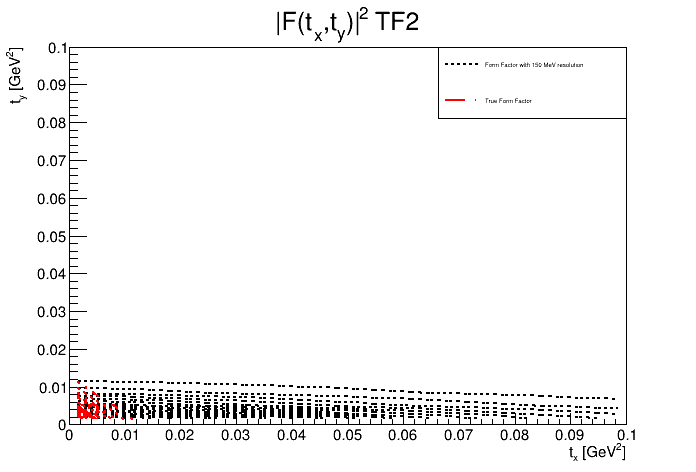

In [11]:
TF2 *ff_wRes1 = res1.getSmearedFormFactor();
    ff_wRes1->SetTitle("|F(t_{x},t_{y})|^{2} TF2");
    ff_wRes1->GetZaxis()->SetTitle("|F(t_{x},t_{y}|^{2}");
    ff_wRes1->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_wRes1->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_wRes1->SetLineStyle(2);
    ff_wRes1->SetLineColor(kBlack);
    ff_wRes1->Draw();

TF2 *trueFF = ff_2D.getFormFactort2_2D();
    trueFF->SetLineStyle(10);
    trueFF->SetLineColor(kRed);
    trueFF->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(ff_wRes1,"Form Factor with 150 MeV resolution","l");
    legend->AddEntry(trueFF,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(0);
c1->Draw();

### Compare TH2D projections: true form factor with smeared form factor 

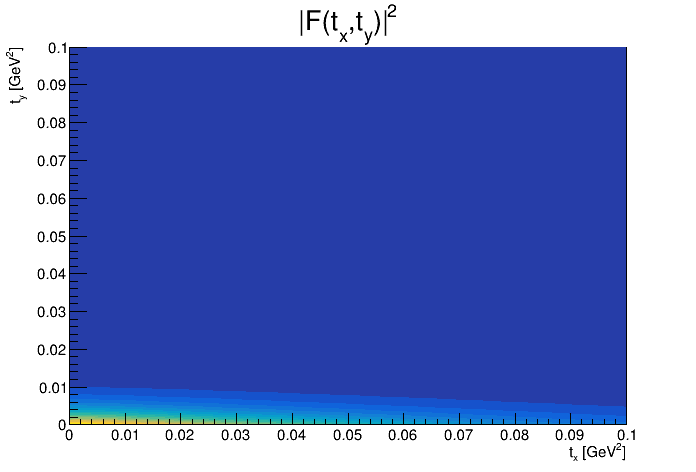

In [4]:
TH2D *ff_wRes1_hist = res1.getSmeared_hist();
    ff_wRes1_hist->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_wRes1_hist->GetZaxis()->SetTitle("|F(t_{x},t_{y}|^{2}");
    ff_wRes1_hist->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_wRes1_hist->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_wRes1_hist->Draw();

gStyle->SetOptStat(0);
c1->Draw();

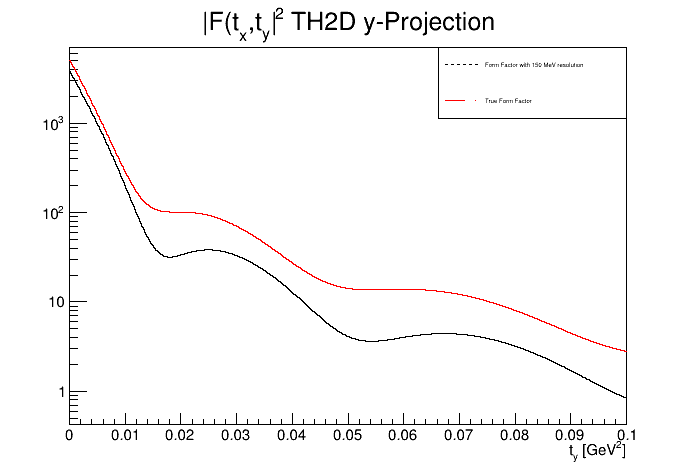

In [22]:
TH2D *ff_wRes1_hist2 = res1.getSmeared_hist();
    ff_wRes1_hist2->SetTitle("|F(t_{x},t_{y})|^{2} y-Projection");
    ff_wRes1_hist2->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_wRes1_hist2->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_wRes1_hist2->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_wRes1_hist2->SetLineStyle(2);
    ff_wRes1_hist2->SetLineColor(kBlack);
    ff_wRes1_hist2->ProjectionY()->Draw();

TH2D *trueFF_hist = ff_2D.getFormFactort_hist();
    trueFF_hist->SetLineStyle(10);
    trueFF_hist->SetLineColor(kRed);
    trueFF_hist->ProjectionY()->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(ff_wRes1_hist2,"Form Factor with 150 MeV resolution","l");
    legend->AddEntry(trueFF_hist,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Draw();

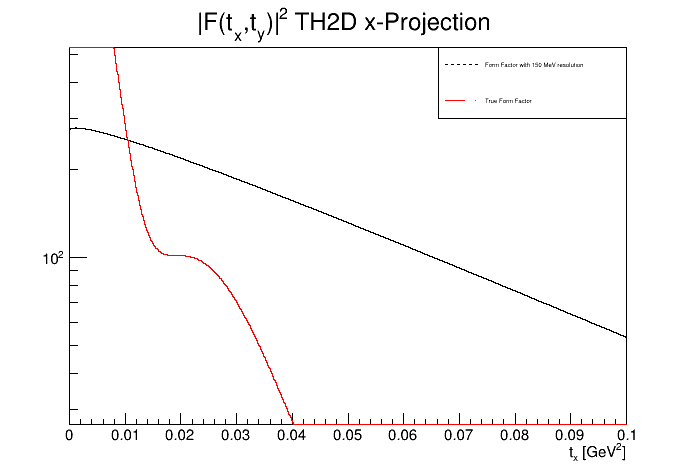

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
TH2D *ff_wRes1_hist3 = res1.getSmeared_hist();
    ff_wRes1_hist3->SetTitle("|F(t_{x},t_{y})|^{2} TH2D x-Projection");
    ff_wRes1_hist3->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_wRes1_hist3->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_wRes1_hist3->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_wRes1_hist3->GetYaxis()->SetRangeUser(0,1e4);
    ff_wRes1_hist3->SetLineStyle(2);
    ff_wRes1_hist3->SetLineColor(kBlack);
    ff_wRes1_hist3->ProjectionX()->Draw();

TH2D *trueFF_hist2 = ff_2D.getFormFactort_hist();
    trueFF_hist2->SetLineStyle(10);
    trueFF_hist2->SetLineColor(kRed);
    trueFF_hist2->ProjectionX()->Draw("same");

auto legend = new TLegend(0.63,0.75,0.9,0.9);
	legend->AddEntry(ff_wRes1_hist3,"Form Factor with 150 MeV resolution","l");
    legend->AddEntry(trueFF_hist2,"True Form Factor","l");
    legend->Draw();

gPad->SetLogy(1);
gStyle->SetOptStat(0);
c1->Draw();

** note: the x-projection is different because smearing is added to x-direction